In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#%matplotlib notebook
plt.rcParams['figure.figsize']=[15,7]

In [19]:
def read_data(path):
    data = np.load(path)
    labels = data.T[-1]
    data = np.delete(data.T, -1, 0)
    
    return data.T, labels

output_filename = "pca_trans_raw_train_data.npy"#sys.argv[2]
number_of_dimensions = 59#sys.argv[3]


x_train, y_train = read_data("fashion_train.npy")
x_train = np.load("data_0-1_norm.npy")#"norm_data.npy")
#x_test, y_test = read_data("fashion_test.npy")


In [20]:
class Pca:
    def __init__(self, data, mean=None, cov_mat=None):
        self.data = data # X
        self.eigen_matrix = None # W
        self.mean = mean #M
        self.cov_mat = cov_mat # Sigma with hat
        self.eigen_vectors = None
        self.eigen_values = None
        self.run()
        pass
    
    def calc_mean(self):
        # calculate vector of means in all dimensions
        self.mean = np.zeros(shape=len(self.data[0]))
        for pic in self.data:
            for j in range(0, len(pic)):
                self.mean[j] += pic[j]
        count = len(self.data)
        self.mean = list(map(lambda x: x / count, self.mean))
    
    def sub_mean(self):
        # subtract mean from the data
        # we dont want to change the data itself
        # so we copy them to tmp and store changed data
        tmp = np.zeros(shape=self.data.shape)
        for i in range(0, len(self.data)):
            for j in range(0, len(self.data[i])):
                tmp[i][j] = self.data[i][j] - self.mean[j]
        self.data = tmp
    
    def plot_variance_proportion(self):
        # plot proportion of variance 
        eig_sum = np.sum(self.eigen_values)
        result = np.zeros(shape=len(self.eigen_values))
        for i in range(0, len(self.eigen_values)):
            if (i != 0):
                result[i] = result[i - 1] + self.eigen_values[i]
            else:
                result[i] = self.eigen_values[i]
            result[i - 1] /= eig_sum
        result[len(self.eigen_values) - 1] /= eig_sum
        
        x = np.linspace(1, len(self.eigen_values), len(self.eigen_values))
        plt.scatter(x, result)
        plt.show()
    
    def plot_eigenvalues(self):
        x = np.linspace(1, len(self.eigen_values), len(self.eigen_values))
        plt.scatter(x, self.eigen_values)
        plt.show()
    
    def eigen_vecs(self):
        # calculate eigenvectors
        # using eigh since cov_mat is symmetric, no need to sort it afterwards
        val, vec = np.linalg.eigh(self.cov_mat)
        # sort all by eigenvalues
        #idx = np.argsort(val)[::-1]
        self.eigen_values = list(reversed(val))#[idx]
        self.eigen_vectors = list(reversed(np.transpose(vec)))#[:, idx])
    
    def calc_suitable_output_dim(self):
        eig_mean = np.mean(self.eigen_values)
        return len(list(filter(lambda x: x > eig_mean, self.eigen_values)))
    
    def choose_eigenvectors(self, dim):
        # choose dim largest leading eigenvectors
        eig = [self.eigen_vectors[i] for i in range(0, dim)]
        return eig
    
    def transform_data(self, dim):
        # do the transformation of data to specified dimension
        if (dim == 0):
            dim = self.calc_suitable_output_dim()
        w = self.choose_eigenvectors(dim)
        return list(map(lambda x:np.matmul(w, x), self.data))
    
    
    def cov_matrix(self):
        # calculate covariance matrix
        self.cov_mat = np.matmul(np.transpose(self.data), self.data) / len(self.data) 
    
    def run(self):
        # computes eigenvectors from data
        self.calc_mean()
        self.sub_mean()
        self.cov_matrix()
        self.eigen_vecs()
        


In [21]:
pca = Pca(x_train)

In [22]:
# pca to 2D
new_data = pca.transform_data(2)


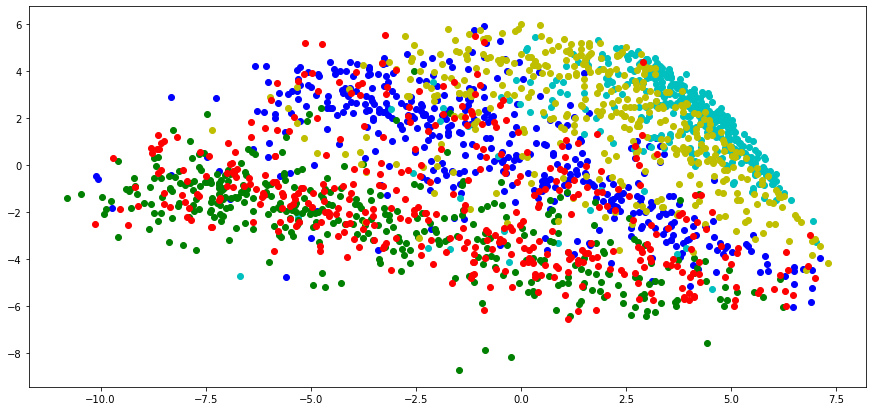

In [23]:
# splits the points into differect list based on what class
# they belong to, also we take only 20% data for plot
def split(points, labels, dim):
    results = [[],[],[],[],[]]
    for i in range(0, len(labels)):
        if (np.random.rand() > 0.8):
            results[labels[i]].append(points[i])
    return results
# transpose the class lists so that each axis is in separeta list
show = list(map(lambda x: np.transpose(x), split(new_data, y_train, 5)))
"""
plt.plot(show[0][0], np.zeros(shape=len(show[0][0])), 'ro', c='b')
plt.plot(show[1][0], np.zeros(shape=len(show[1][0])), 'ro', c='c')
plt.plot(show[2][0], np.zeros(shape=len(show[2][0])), 'ro', c='g')
plt.plot(show[3][0], np.zeros(shape=len(show[3][0])), 'ro', c='y')
plt.plot(show[4][0], np.zeros(shape=len(show[4][0])), 'ro')
"""
plt.plot(show[0][0], show[0][1], 'ro', c='b')
plt.plot(show[1][0], show[1][1], 'ro', c='c')
plt.plot(show[2][0], show[2][1], 'ro', c='g')
plt.plot(show[3][0], show[3][1], 'ro', c='y')
plt.plot(show[4][0], show[4][1], 'ro')
plt.show()

In [24]:
# pca to 3D
results = pca.transform_data(3)
# transpose the class lists so that each axis is in separeta list
show = list(map(lambda x: np.transpose(x), split(results, y_train, 5)))


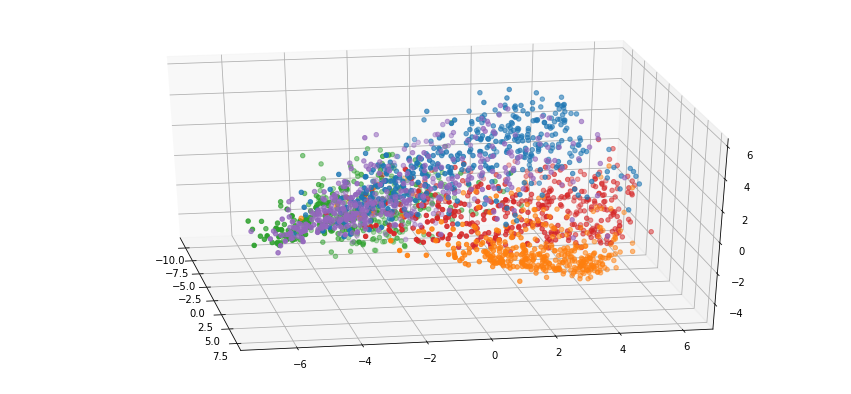

In [25]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(show[0][0], show[0][1], show[0][2], cmap='Greens');
ax.scatter3D(show[1][0], show[1][1], show[1][2], cmap='Greens');
ax.scatter3D(show[2][0], show[2][1], show[2][2], cmap='Greens');
ax.scatter3D(show[3][0], show[3][1], show[3][2], cmap='Greens');
ax.scatter3D(show[4][0], show[4][1], show[4][2], cmap='Greens');
ax.view_init(0, 150)
# rotate the axes and update
for angle in range(0, 36):
    ax.view_init(30, angle*10)
    #plt.draw()
    #plt.pause(.001)
    plt.savefig("fig"+str(angle))

In [26]:
np.save(output_filename, pca.transform_data(number_of_dimensions))

In [27]:
tmp=pca.transform_data(0)

In [28]:
print (len(tmp[1]))

59


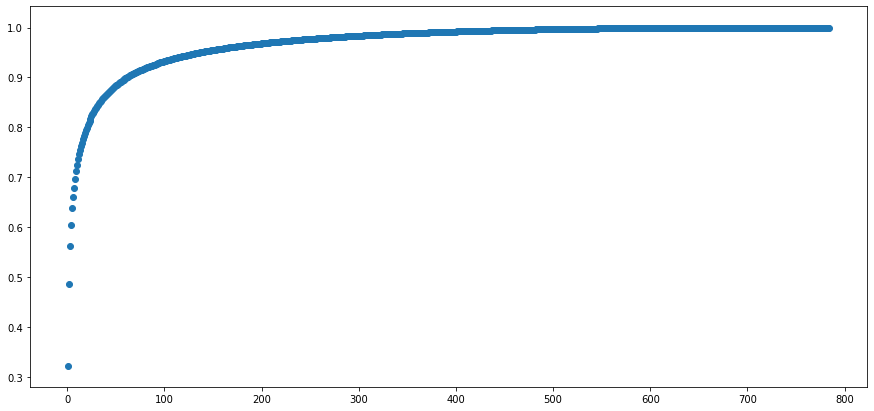

In [29]:
pca.plot_variance_proportion()

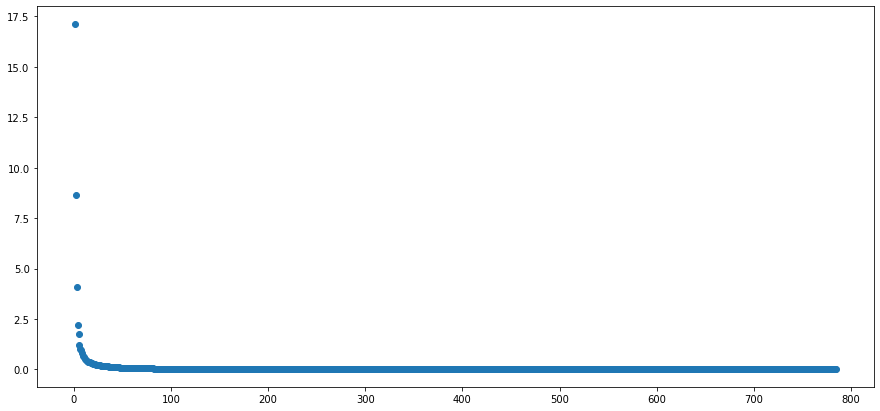

In [30]:
pca.plot_eigenvalues()
